   ## Проект.  Приоритезация гипотез, анализ А/В - теста

Совместно с отделом маркетинга был подготовлен список гипотез для увеличения выручки интернет - магазина.

Описание данных

Данные для первой части

Файл hypothesis: 
 - Hypothesis — краткое описание гипотезы;
 - Reach — охват пользователей по 10-балльной шкале;
 - Impact — влияние на пользователей по 10-балльной шкале;
 - Confidence — уверенность в гипотезе по 10-балльной шкале;
 - Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

Данные для второй части

Файл orders: 
 - transactionId — идентификатор заказа;
 - visitorId — идентификатор пользователя, совершившего заказ;
 - date — дата, когда был совершён заказ;
 - revenue — выручка заказа;
 - group — группа A/B-теста, в которую попал заказ.

Файл visitors 
 - date — дата;
 - group — группа A/B-теста;
 - visitors — количество пользователей в указанную дату в указанной группе A/B-теста

### Часть 1. Приоритезация гипотез.

In [1]:
import pandas as pd
import scipy.stats as stats
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
hypothesis = pd.read_csv('/datasets/hypothesis.csv')

In [3]:
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


In [4]:
hypothesis.columns = hypothesis.columns.str.lower()

In [5]:
pd.set_option('max_colwidth', -1)

Рассмотрим приоритезацию способом ICE - влияние, уверенность, простота:

In [6]:
hypothesis['ICE'] = (hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts']
display(hypothesis[['hypothesis', 'ICE']].sort_values(by='ICE', ascending=False)\
       .style.format({'ICE':'{:.3}'}).bar(subset=['ICE',], color='lightblue')\
       .set_caption('ICE'))

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.2
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.0


Рассмотрим приоретизацию способом RICE - охват, влияние, уверенность, простота:

In [7]:
hypothesis['RICE'] = (hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts']
display(hypothesis[['hypothesis', 'RICE']].sort_values(by='RICE', ascending=False)\
       .style.format({'RICE':'{:.4}'}).bar(subset=['RICE',], color='lightblue')\
       .set_caption('RICE'))

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


Вывод: наиболее перспетивные гипотезы по ICE: 8, 0, 7. По RICE наиболее перспективные гипотезы 7, 2, 0, 6. Но на первом месте уже 7 гипотеза, так получилось потому что ее параметр Reach (скольких пользователей затронет изменение) равен 10, в то время как у других гипотез он меньше. Согласно проведенной приоритезации наиболее перспеткивной является гипотеза 7 (добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок) так как она затронет большее количество пользователей и гипотеза 0.	 

## Часть 2. Анализ А/В - теста.

In [8]:
orders = pd.read_csv('/datasets/orders.csv', sep=',')
visitors = pd.read_csv('/datasets/visitors.csv', sep=',')

                                               Таблица orders

In [9]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [10]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null object
revenue          1197 non-null int64
group            1197 non-null object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [11]:
orders.isna().sum()

transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64

In [12]:
orders.duplicated().sum()

0

                                             Таблица visitors

In [13]:
visitors.tail()

,date,group,visitors
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490
61,2019-08-31,B,718


In [14]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null object
group       62 non-null object
visitors    62 non-null int64
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [15]:
visitors.isna().sum()

date        0
group       0
visitors    0
dtype: int64

In [16]:
visitors.duplicated().sum()

0

Проверим равенство групп А и В

In [17]:
print('Число визитов группа А = {0:.0f}'.format(visitors[visitors['group']=='A']['visitors'].sum()))
print('Число визитов группа B = {0:.0f}'.format(visitors[visitors['group']=='B']['visitors'].sum()))

Число визитов группа А = 18736
Число визитов группа B = 18916


Разница между группами чуть менее 1%, это допустимое отклонение. 

Проверим количество посетителей попавших в обе группы 

In [18]:
orders.groupby('visitorId').agg({'group':'nunique'}).query('group == 2').count()

group    58
dtype: int64

Имеем 58 пользователей, которые состоят в группе А и В. Это ошибка и надо сообщить разработчикам, чтобы они правили систему распределения пользователей по группам. Преподаватель сказал, что в этом проекте их исключать не нужно, поэтому дальнейший анализ продолжим с ними.

Вывод: данные проверены, пропуски, дубликаты отсутствуют. Присутствует несоответствие типа данных в обоих таблицах в столбцах date, приведем их в нужный формат ниже.

 ### График кумулятивной выручки по группам

Создадим массив уникальных пар значений дат и групп теста

In [19]:
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

In [20]:
datesGroups = orders[['date','group']].drop_duplicates()

Получим агрегированные кумулятивные по дням данные о заказах

In [21]:
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'],\
                                                                     orders['group'] == x['group'])]\
                                    .agg({'date' : 'max', 'group' : 'max', 'transactionId' : pd.Series.nunique,\
                                          'visitorId' : pd.Series.nunique, 'revenue' : 'sum'}), axis=1)\
                               .sort_values(by=['date','group'])

Получим агрегированные кумулятивные по дням данные о посетителях интернет-магазина 

In [22]:
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'],\
                                                                         visitors['group'] == x['group'])]\
                                       .agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1)\
                                .sort_values(by=['date','group'])

Объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия

In [23]:
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on = ['date', 'group'], right_on = ['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

Построим графики кумулятивной выручки по группам A/B-тестирования:

In [24]:
cumulativeRevenueA = cumulativeData[cumulativeData['group'] == 'A'][['date', 'revenue', 'orders']]

In [25]:
cumulativeRevenueB = cumulativeData[cumulativeData['group'] == 'B'][['date', 'revenue', 'orders']]

<a id='1'></a> 

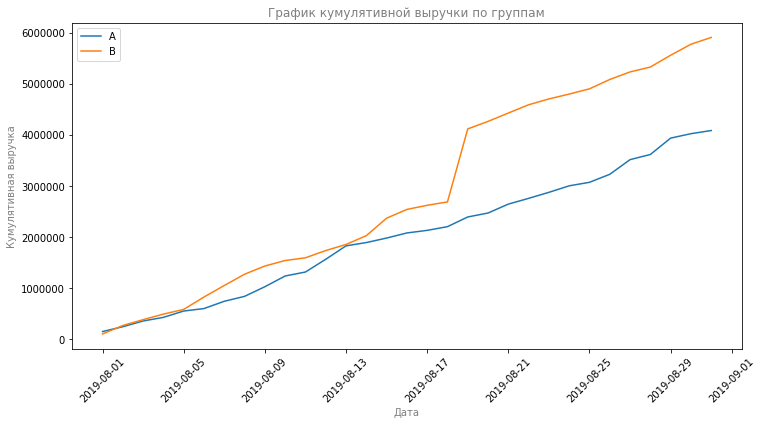

In [26]:
plt.figure(figsize = (12, 6))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label = 'A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label = 'B')
plt.xlabel('Дата', color = "grey")
plt.ylabel('Кумулятивная выручка', color = "grey")
plt.title('График кумулятивной выручки по группам', color = "grey")
plt.xticks(rotation=45)
plt.legend();

Выручка почти равномерно увеличивается в течение всего теста.Однако график группы В имеет резкий рост, это может говорить о появлении дорогих заказов или всплеске числа заказов. 

### График кумулятивного среднего чека по группам

<a id='2'></a> 

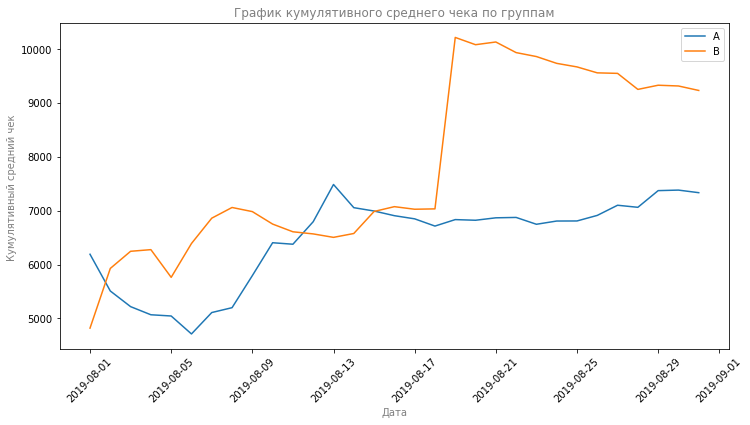

In [27]:
plt.figure(figsize = (12, 6))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.xlabel('Дата', color = "grey")
plt.ylabel('Кумулятивный средний чек ', color = "grey")
plt.title('График кумулятивного среднего чека по группам', color = "grey")
plt.xticks(rotation=45)
plt.legend(); 

Наблюдаем рост среднего чека для группы А и его дальнейшую стабилизацию, у группы В график имеет больше всплесков. Возможно в группу В попали крупные заказы.

### График относительного изменения кумулятивного среднего чека группы B к группе A

Собираем данные в одном датафрейме.

In [29]:
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on = 'date',\
                                                   right_on = 'date', how = 'left', suffixes = ['A', 'B'])

<a id='3'></a> 

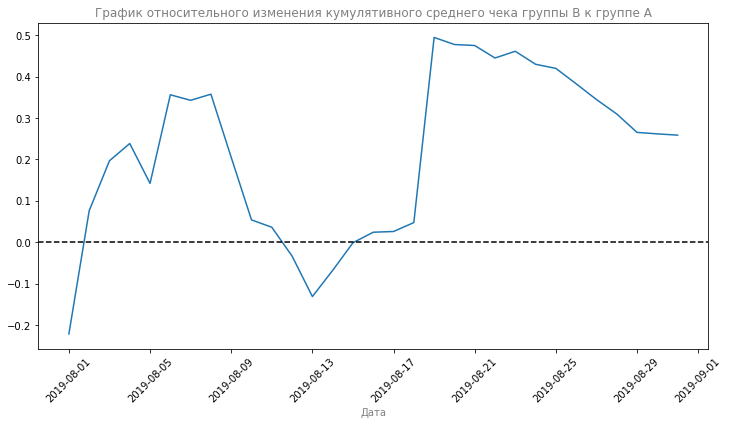

In [30]:
plt.figure(figsize = (12, 6))
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB'] / mergedCumulativeRevenue['ordersB']) /\
         (mergedCumulativeRevenue['revenueA']  /mergedCumulativeRevenue['ordersA']) - 1)
plt.xlabel('Дата', color = "grey")
plt.title('График относительного изменения кумулятивного среднего чека группы В к группе А', color = "grey")
plt.xticks(rotation = 45)
plt.axhline(y = 0, color = 'black', linestyle = '--'); 

В нескольких точках график различия между сегментами резко меняется. Вероятно это крупные заказы и выбросы.

### График кумулятивной конверсии по группам

Считаем кумулятивную конверсию.

In [31]:
cumulativeData['conversion'] = cumulativeData['orders'] / cumulativeData['visitors']

Отделяем данные по группе А и группе В.

In [32]:
cumulativeDataA = cumulativeData[cumulativeData['group'] == 'A']
cumulativeDataB = cumulativeData[cumulativeData['group'] == 'B']

<a id='4'></a> 

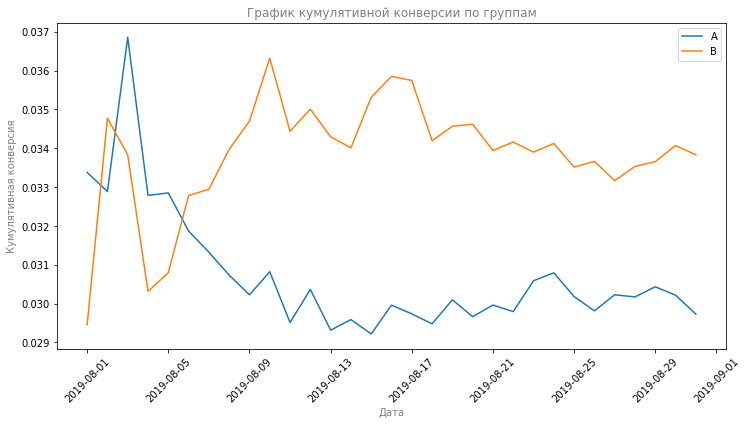

In [33]:
plt.figure(figsize = (12, 6))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label = 'A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label = 'B')
plt.xlabel('Дата', color = "grey")
plt.ylabel('Кумулятивная конверсия', color = "grey")
plt.title('График кумулятивной конверсии по группам', color = "grey")
plt.xticks(rotation = 45)
plt.legend();

Получился почти симмитричный график, конверсия группы В выше, хотя по началу лирдировала группа А. 

### График относительного изменения кумулятивной конверсии группы B к группе A

<a id='5'></a> 

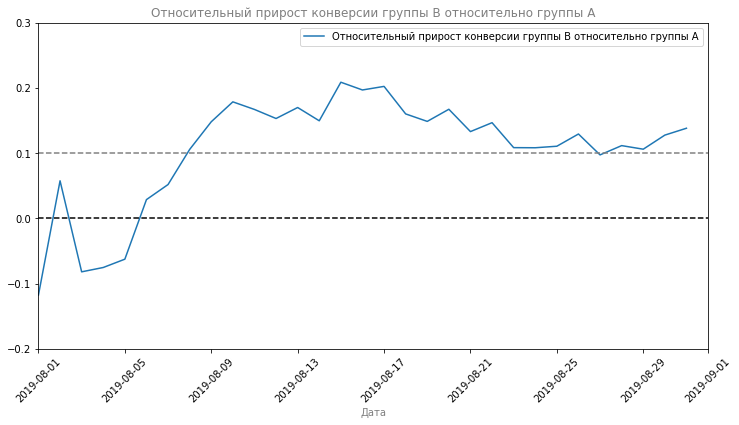

In [34]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']]\
                                             .merge(cumulativeDataB[['date','conversion']],\
                                              left_on = 'date', right_on = 'date', how = 'left', suffixes = ['A', 'B'])
plt.figure(figsize = (12, 6))
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/\
         mergedCumulativeConversions['conversionA'] - 1, \
         label="Относительный прирост конверсии группы B относительно группы A")

plt.legend()
plt.xlabel('Дата', color = "grey")
plt.title('Относительный прирост конверсии группы B относительно группы A', color = "grey")
plt.xticks(rotation = 45)
plt.axis(["2019-08-01", '2019-09-01', -0.2, 0.3])
plt.axhline(y = 0, color = 'black', linestyle = '--')
plt.axhline(y = 0.1, color = 'grey', linestyle = '--');

Почти с самого начала теста группа В лидирует по конверсии, показатель стабилизировался в районе 0.1 и потом пошел вверх о гарантированной стабилицаии пока говорить рано.

### Точечный график количества заказов по пользователям

Подсчитаем количество заказов по пользователям. 

In [35]:
ordersByUsers = (orders.drop(['group', 'revenue', 'date'], axis=1).groupby('visitorId', as_index=False)\
                 .agg({'transactionId': pd.Series.nunique}))

In [36]:
ordersByUsers.columns = ['visitorId', 'orders']
ordersByUsers.sort_values(by='orders', ascending=False).head(5)

,visitorId,orders
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5


<a id='6'></a> 

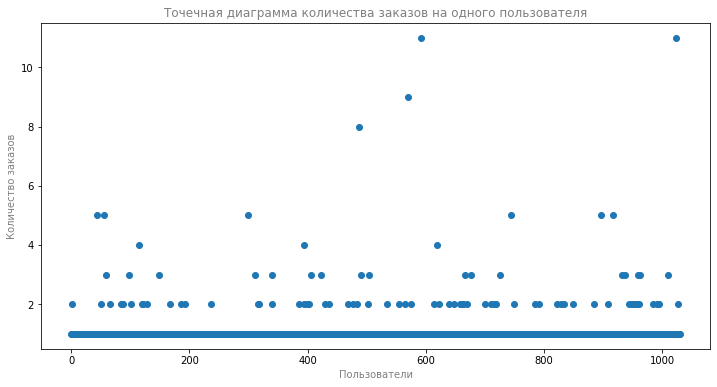

In [37]:
x_values = pd.Series(range(0,len(ordersByUsers)))
plt.figure(figsize = (12, 6))
plt.xlabel('Пользователи', color = "grey")
plt.ylabel('Количество заказов', color = "grey")
plt.title('Точечная диаграмма количества заказов на одного пользователя', color = "grey")
plt.scatter(x_values, ordersByUsers['orders']); 

В основном пользователи совершают 1 покупку, но и есть фанаты по 11 покупок, также не мало тех кто и по 2 покупки делает.

### 95-й и 99-й перцентили количества заказов на пользователя

In [38]:
print('95 перцентиль: %.2f' % np.percentile(ordersByUsers['orders'], [95]))
print('99 перцентиль: %.2f' % np.percentile(ordersByUsers['orders'], [99]))

95 перцентиль: 2.00
99 перцентиль: 4.00


Не более 5% пользователей оформляли больше чем 2 заказа. И 1% пользователей заказывали более четырех раз. Границей для отбрасывания аномального количества заказов выберем 5%, т.е. 2 заказа включительно. 

### Точечный график стоимостей заказов

<a id='7'></a> 

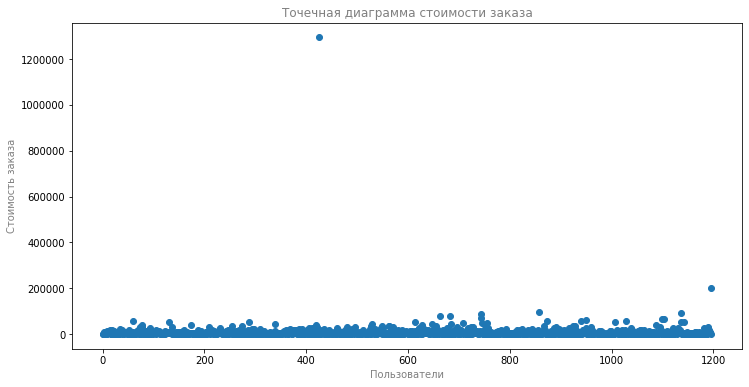

In [39]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.figure(figsize = (12, 6))
plt.xlabel('Пользователи', color = "grey")
plt.ylabel('Стоимость заказа', color = "grey")
plt.title('Точечная диаграмма стоимости заказа', color = "grey")
plt.scatter(x_values, orders['revenue']); 

Наблюдаем анамальных покупателей, со стоимостью заказа более 1,2 млн и около 200 тыс.

Построим график без аномальных пользователей.

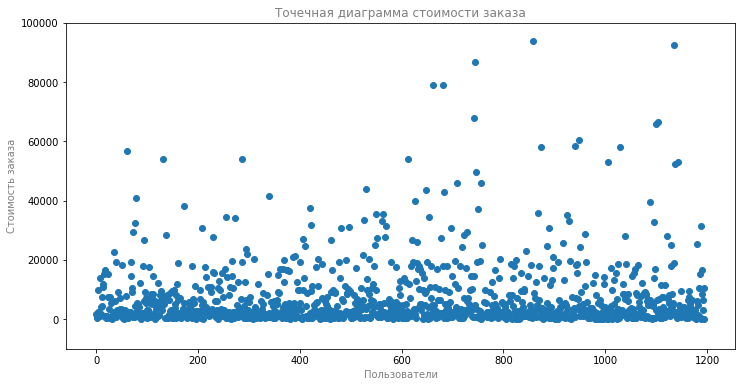

In [40]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.figure(figsize = (12, 6))
plt.ylim([-10000, 100000])
plt.xlabel('Пользователи', color = "grey")
plt.ylabel('Стоимость заказа', color = "grey")
plt.title('Точечная диаграмма стоимости заказа', color = "grey")
plt.scatter(x_values, orders['revenue']); 

На графике хорошо видно что большая часть заказов распологается до 20 000.

### 95-й и 99-й перцентили стоимости заказов

In [41]:
print('95 перцентиль: %.2f' % np.percentile(orders['revenue'], [95]))
print('99 перцентиль: %.2f' % np.percentile(orders['revenue'], [99]))

95 перцентиль: 28000.00
99 перцентиль: 58233.20


Не более 5% пользователей оформляли больше чем 28000. И 1% пользователей заказывали более 58233. Границей для отбрасывания аномальной стоимости заказа выберем 5%, т.е. 28000 включительно. 

<div class = "alert alert-success">
<b> Комментарии ревьюера </b>

Выбор по аномальному количеству заказов и по аномальной стоимости заказов для очистки данных от выбросов сделан, отлично!

</div>

### Расчет статистической значимости различий в конверсии между группами по «сырым» данным

Нулевая гипотеза: статистически значимых различий в конверсии между группами нет

Альтернативная гипотеза: статистически значимых различий в конверсии между группами есть

In [42]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

In [43]:
visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

In [44]:
data = (visitorsADaily.merge(visitorsBDaily, left_on = 'date', right_on = 'date', how = 'left'))


data.head(5)

,date,visitorsPerDateA,visitorsPerDateB
0,2019-08-01,719,713
1,2019-08-02,619,581
2,2019-08-03,507,509
3,2019-08-04,717,770
4,2019-08-05,756,707


Создадим переменные.

In [45]:
ordersByUsersA = (orders[orders['group'] == 'A'].groupby('visitorId', as_index=False).agg({'transactionId': pd.Series.nunique}))
ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = (orders[orders['group'] == 'B'].groupby('visitorId', as_index=False).agg({'transactionId': pd.Series.nunique}))
ordersByUsersB.columns = ['visitorId', 'orders'] 

Объявим переменные sampleA и sampleB, в которых пользователям из разных групп будет соответствовать количество заказов.

In [46]:
sampleA = pd.concat([ordersByUsersA['orders'], pd.Series(0,index=np.arange(data['visitorsPerDateA'].sum() - \
                                                                           len(ordersByUsersA['orders'])),\
                                                         name = 'orders')], axis = 0)
sampleB = pd.concat([ordersByUsersB['orders'], pd.Series(0,index=np.arange(data['visitorsPerDateB'].sum() - \
                                                                           len(ordersByUsersB['orders'])),\
                                                         name = 'orders')], axis = 0)                                        

In [47]:
print('Р-value = {0:.3f}'.format(stats.mannwhitneyu(sampleA, sampleB, alternative = 'two-sided')[1]))

print('Относительная разница = {0:.3f}'.format(sampleB.mean() / sampleA.mean() - 1))

Р-value = 0.017
Относительная разница = 0.138


По "сырым" данным различия в конверсии групп А и В есть. Значит, нулевую гипотезу о том, что статистически значимых различий в конверсии между группами нет, отвергаем. Относительный прирост конверсии группы В к конверсии группы А равен 13,8%. 

### Расчет статистической значимости различий в среднем чеке заказа между группами по «сырым» данным

Нулевая гипотеза: различия в среднем чеке есть

Альтернативная гипотеза: различий в среднем чеке нет

In [48]:
print('Р-value = {0:.3f}'.format(stats.mannwhitneyu(orders[orders['group'] == 'A']['revenue'], \
                                                    orders[orders['group'] == 'B']['revenue'], alternative = 'two-sided') [1]))
print('Относительная разница = {0:.3f}'.format(orders[orders['group'] == 'B']['revenue'].mean() /\
                                               orders[orders['group'] == 'A']['revenue'].mean() - 1)) 
print('Средний чек группа А = {0:.2f} '.format(orders[orders['group'] == 'A']['revenue'].mean()))
print('Средний чек группа B = {0:.2f} '.format(orders[orders['group'] == 'B']['revenue'].mean()))

Р-value = 0.729
Относительная разница = 0.259
Средний чек группа А = 7333.58 
Средний чек группа B = 9230.88 


P-value значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. Кроме того относительное различие чека между группами 25,9%. Вероятно эти те крупные покупки, что мы выявили ранее.

### Расчет статистической значимости различий в конверсии между группами по «очищенным» данным

Нулевая гипотеза: статистически значимых различий в конверсии между группами нет

Альтернативная гипотеза: статистически значимых различий в конверсии между группами есть

Примем за аномальных пользователей, тех кто совершил от 2 заказов и дороже 28 000.  

In [49]:
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > 2]['visitorId'],\
                                 ordersByUsersB[ordersByUsersB['orders'] > 2]['visitorId']], axis = 0)

In [50]:
usersWithExpensiveOrders = orders[orders['revenue'] > 28000]['visitorId']

In [51]:
abnormalUsers = (pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values())
abnormalUsers.head()

1099    148427295
18      199603092
928     204675465
23      237748145
37      249864742
Name: visitorId, dtype: int64

In [52]:
abnormalUsers.shape

(74,)

Имеем 74 аномальных пользователя.

In [53]:
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))]['orders'],\
                             pd.Series(0,index = np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])),\
                                       name = 'orders')], axis = 0)


In [54]:
sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))]['orders'],\
                             pd.Series(0, index = np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])),\
                                       name = 'orders')],axis = 0) 

Применим статистический критерий Манна-Уитни к полученным выборкам.

In [55]:
print('Р-value = {0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered, alternative = 'two-sided')[1]))
print('Относительная разница = {0:.3f}'.format(sampleBFiltered.mean() / sampleAFiltered.mean() - 1)) 

Р-value = 0.013
Относительная разница = 0.173


Результаты по конверсии практически не изменились.

### Расчет статистической значимости различий в среднем чеке заказа между группами по «очищенным» данным

Нулевая гипотеза: различия в среднем чеке есть

Альтернативная гипотеза: различий в среднем чеке нет

In [56]:
print('Р-value = {0:.3f}'.format(stats.mannwhitneyu(orders[np.logical_and(orders['group'] == 'A',\
                                                                          np.logical_not(orders['visitorId']\
                                                                                        .isin(abnormalUsers)))]['revenue'],\
                                                    orders[np.logical_and(orders['group'] == 'B',\
                                                                          np.logical_not(orders['visitorId']\
                                                                                        .isin(abnormalUsers)))]['revenue'],\
                                                    alternative = 'two-sided')[1]))
print('Относительная разница = {0:.3f}'.format(orders[np.logical_and(orders['group'] == 'B',\
                                                                     np.logical_not(orders['visitorId']\
                                                                                .isin(abnormalUsers)))]['revenue'].mean() / \
                                               orders[np.logical_and(orders['group'] == 'A',
                                                                     np.logical_not(orders['visitorId']\
                                                                                    .isin(abnormalUsers)))]['revenue']
                                               .mean() - 1)) 
print('Средний чек группа А = {0:.2f} '.format(orders[np.logical_and(orders['group'] == 'A',\
                                                np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean()))
print('Средний чек группа B = {0:.2f} '.format(orders[np.logical_and(orders['group'] == 'B',\
                                                np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean()))

Р-value = 0.738
Относительная разница = -0.020
Средний чек группа А = 5166.61 
Средний чек группа B = 5065.22 


P-value практически не изменился, разница между сегментами сократилась с 25,9% до 2%.

### Решение по результатам теста

   Перед нами стояла цель увеличить выручку, для этого необходимо приоритезировать гипотезы и провести А/В - тестирование. Были предоствелны данные: таблица с гипотезами, таблица с визитами и таблица с заказами. При обработке данных было выявлено не соответсвие дат типам данных, переведены надвания столбцов к строчным буквам в таблице с гипотезами, также было обнаружено 58 пользователей, которые состоят в группе А и В. Это ошибка и надо сообщить разработчикам, чтобы они правили систему распределения пользователей по группам, разница между тестовыми группами в пределах нормы до 1%.

Согласно проведенной приоритезации наиболее перспеткивной является гипотеза 7 (добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок) так как она затронет большее количество пользователей и также гипотеза 0 (добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей). 	 

При анализе А/В-теста мы произвели следующие действия:
- построили [график кумулятивной выручки по группам](#1). Выручка в обоих группах растет, но группа В имеет реский рост, это может свидетельствовать о возможном попаднии крупных заказов в выборку;
- построили [график кумулятивного среднего чека по группам](#2).Наблюдаем рост среднего чека для группы А и его дальнейшую стабилизацию, у группы В график имеет больше всплесков. Возможно в группу В попали крупные заказы;
- построили [график относительного изменения кумулятивного среднего чека группы В к группе А](#3). В нескольких точках график различия между сегментами резко меняется. Вероятно это крупные заказы и выбросы;
- построили [график кумулятивной конверсии по группам](#4). Конверсия группы В выше;
- построили [график относительного изменения кумулятивной конверсии группы В к группе А](#5). Группа В лидирует по конверсии, показатель стабилизировался в районе 0.1, имеет тенденцию к росту;
- посторили [точечный график количества заказов по пользователям](#6). В основном пользователи совершают 1 покупку, но и есть фанаты по 11 покупок;
- посчитали 95 и 99 перцентили количества заказов на пользователя. Не более 5% пользователей оформляли больше чем 2 заказа. И 1% пользователей заказывали более четырех раз. Границей для отбрасывания аномального количества заказов выбрали 5%, т.е. 2 заказа включительно;
- постороили [точечный график стоимостей заказов](#7). Наблюдаем анамальных покупателей, со стоимостью заказа более 1,2 млн и около 200 тыс., вообщем заказы укладывются до 20 000; 
- посчитали 95 и 99 перцентили стоимости заказов. Не более 5% пользователей оформляли больше чем на 28 000. И 1% пользователей заказывали более чем 58 233. Границей для отбрасывания аномальной стоимости заказа выберем 5%, т.е. 28 000 включительно;
- рассчитали статистическую значимость различий в конверсии между группами по "сырым" данным. Различия в конверсии групп А и В есть и равны 1,7%. Относительный прирост конверсии группы В к конверсии группы А равен 13,8%;
- рассчитали статистическую значимость различий в среднем чеке заказа между группами по "сырым" данным. P-value = 72,9 %. В среднем чеке есть различия. Кроме того относительное различие чека между группами 25,9%;
- рассчитали статистическую значимость различий в конверсии между группами по "очищенным" данным. Было обнаружено 74 аномальных пользователя, результаты относительно "сырых" данных практически не изменились. Различия в конверсии групп А и В есть и равны 1,3%. Относительный прирост конверсии группы В к конверсии группы А равен 17,3%
- рассчитали статистическую значимость различий в среднем чеке заказа между группами по "очищенным" данным. P-value практически не изменился и равен 73,8%. В среднем чеке есть различия, разница между сегментами сократилась с 25,9% до 2%.

По результатам принято решение остановить тест:

 - Есть статистически значимое различие по конверсии между группами как по сырым данным, так и после фильтрации аномалий;
 - По сырым данным есть статистически значимое различие по среднему чеку между группами.И после удаления аномалий статистически значимые различия есть;
 - График различия конверсии между группами сообщает, что результаты группы B лучше группы A: имеют тенденцию к росту, либо зафиксировались около среднего значения.